In [1]:
%load_ext autoreload
%autoreload 2
import tifffile as tiff
import numpy as np
import sys
from pathlib import Path
from skimage.metrics import peak_signal_noise_ratio,structural_similarity
from matplotlib import pyplot as plt
import pandas as pd

sys.path.append(str(Path("..").resolve()))
from src import *

# Denoising with Means and Medians

ℹ️ This notebook requires the samples of OABF dataset in the `dataset/sample/motion_corrected` folder generated with [1.1.1-Visualize_OABF_Dataset](../1-eda/1.1.1-Visualize_OABF_Dataset.ipynb).

In [2]:
dataset = Path("../dataset/dati_per_erzelli/mini2p_astro/good_example/2024Feb06-007")
sample_dir = Path("../dataset/sample")
raw_file = dataset / "raw_data/tSer_00001.tif"
motion_corrected_file = dataset / "motion_corrected/M2P_astro_OF_001_concatenate_corrected_aligned.tiff"
motion_corrected_sample_file = sample_dir / "motion_corrected" / "oabf_good_example.tiff"
deepcad_file = dataset / "denoised/M2P_astro_OF_001_concatenate_corrected_alignedf_E_05_Iter_6048_output.tif"
deepcad_sample_file = sample_dir / "deepcad" / "oabf_good_example.tiff"

The values must be ranged 0-1 because `sigma_psd` depends on it.

In [3]:
# 6s
motion_corrected_tiff = tiff.imread(motion_corrected_sample_file).astype(np.float32)
motion_corrected = motion_corrected_tiff / np.max(motion_corrected_tiff)
deepcad_tiff = tiff.imread(deepcad_sample_file).astype(np.float32)
deepcad = deepcad_tiff / np.max(deepcad_tiff)

## Visualize values distribution

The values distribution is exponential

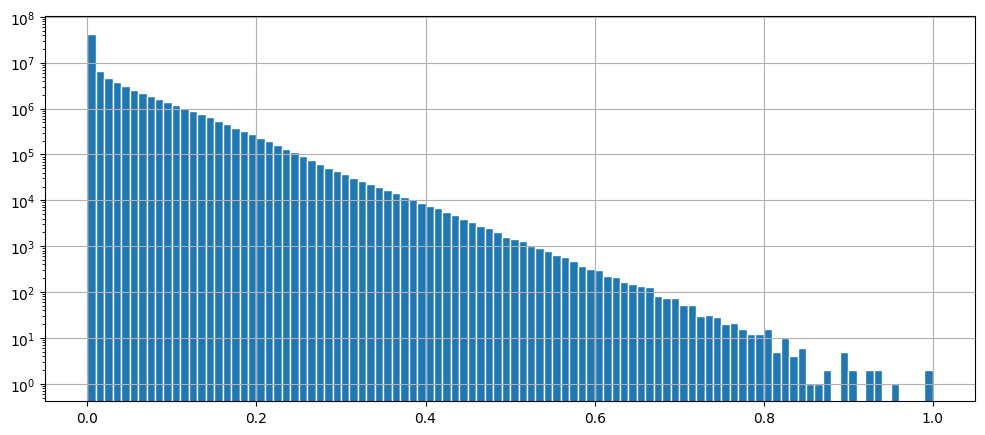

In [21]:
pd.Series(motion_corrected.flatten()).hist(figsize=(12, 5), bins=100,edgecolor='white')
plt.yscale("log")

## Export motion corrected slice as video

In [74]:
motion_corrected_norm = normalize(motion_corrected, 3, 99)
motion_corrected_norm = np.clip(motion_corrected_norm, max=1)

In [ ]:
iio.imwrite(
    uri='motion_corrected.mp4',
    image=motion_corrected_norm,
    fps=30,
    codec="libx264",  # H.264 codec
    bitrate="6000k",
);

In [81]:
Video(url="motion_corrected.mp4")

## Generate means and medians for different sliding window sizes

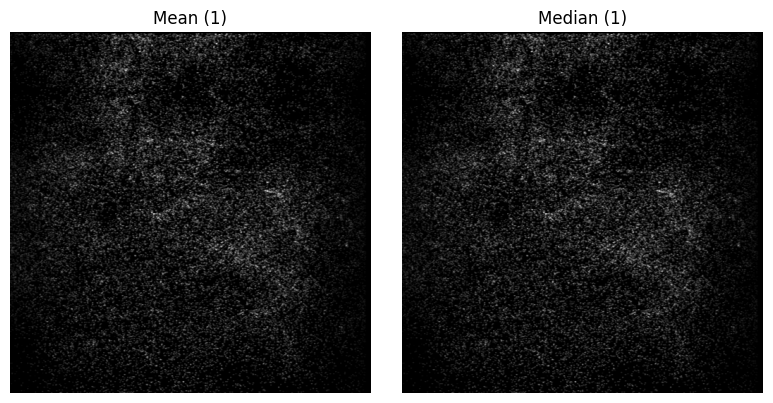

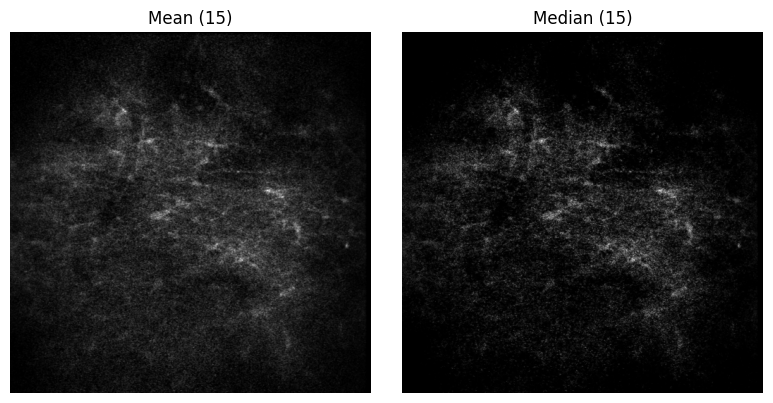

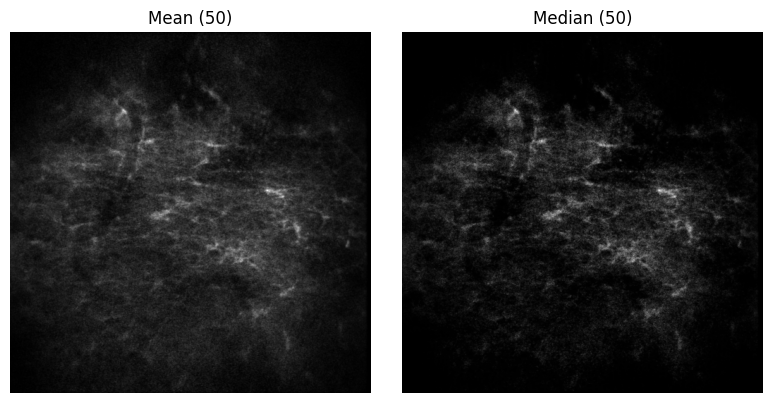

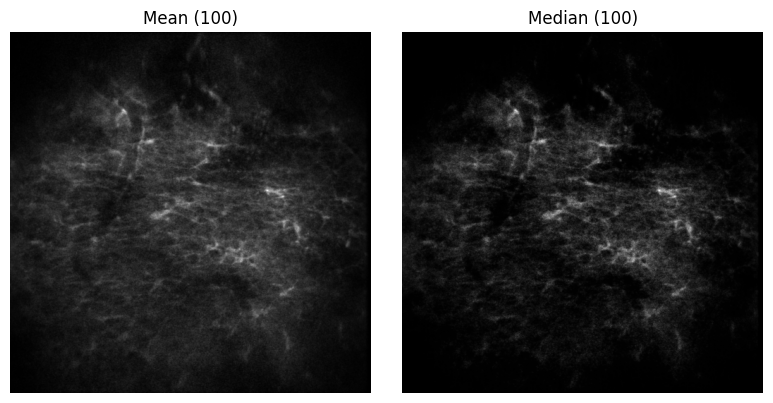

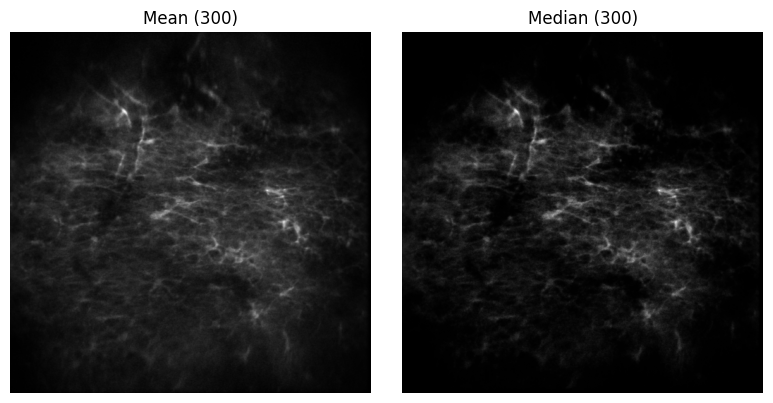

In [ ]:
for i in [1, 15, 50, 100, 300]:
    mean, median = (_(motion_corrected[:i], axis=0) for _ in [np.mean, np.median])
    imshow({f"Mean ({i})": mean, f"Median ({i})": median}, cmap="gray", size=6)